## Load Data and Basic Info

In [47]:
import pandas as pd

def load_data(file_path):
    df = pd.read_csv(file_path)
    print("✅ Data loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    return df

def basic_info(df):
    print("\n===== BASIC DATASET INFORMATION =====")
    print(f"Rows: {df.shape[0]:,}")
    print(f"Columns: {df.shape[1]}")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print("\nColumn Data Types:")
    print(df.dtypes.value_counts())
    print("\nSample Data Preview:")
    print(df.head())

# Usage example:
data_path = r"C:\Users\ENG.YAHYA\Desktop\projects\loan-approval-classification\data\loan_data.csv"  
df = load_data(data_path)
basic_info(df)


✅ Data loaded successfully!
Shape: (45000, 14)
Columns: ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']

===== BASIC DATASET INFORMATION =====
Rows: 45,000
Columns: 14
Memory Usage: 16.68 MB

Column Data Types:
float64    6
object     5
int64      3
Name: count, dtype: int64

Sample Data Preview:
   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   



In [48]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [49]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [50]:
# Get only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
numeric_df = df.select_dtypes(include=['number'])
print(numeric_df)

       person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0            22.0        71948.0               0    35000.0          16.02   
1            21.0        12282.0               0     1000.0          11.14   
2            25.0        12438.0               3     5500.0          12.87   
3            23.0        79753.0               0    35000.0          15.23   
4            24.0        66135.0               1    35000.0          14.27   
...           ...            ...             ...        ...            ...   
44995        27.0        47971.0               6    15000.0          15.66   
44996        37.0        65800.0              17     9000.0          14.07   
44997        33.0        56942.0               7     2771.0          10.02   
44998        29.0        33164.0               4    12000.0          13.23   
44999        24.0        51609.0               1     6665.0          17.05   

       loan_percent_income  cb_person_cred_hist_length  credit_

In [51]:
numeric_df.columns

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')

## Target Variable Distribution 

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

def target_variable_analysis(df):
    print("\n===== TARGET VARIABLE ANALYSIS =====")
    print("Original target distribution:")
    print(df['loan_status'].value_counts())
     
    imbalance_ratio = df['loan_status'].value_counts(normalize=True).min() / \
                      df['loan_status'].value_counts(normalize=True).max()
    print(f"Class imbalance ratio (minority / majority): {imbalance_ratio:.3f}")
    
    return df


df= target_variable_analysis(df)


===== TARGET VARIABLE ANALYSIS =====
Original target distribution:
loan_status
0    35000
1    10000
Name: count, dtype: int64
Class imbalance ratio (minority / majority): 0.286


 ## Missing Values Analysis

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

def missing_values_analysis(df_binary):
    print("\n===== MISSING VALUES ANALYSIS =====")
    missing_counts = df_binary.isnull().sum()
    missing_percent = missing_counts / len(df) * 100
    missing_summary = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing %': missing_percent
    })
    missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)
    
    if missing_summary.empty:
        print("No missing values found!")
    else:
        print(missing_summary)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=missing_summary.index, y=missing_summary['Missing %'], palette='Reds')
        plt.xticks(rotation=45)
        plt.ylabel("Percentage Missing")
        plt.title("Missing Values by Column")
        plt.show()

missing_values_analysis(df)


===== MISSING VALUES ANALYSIS =====
No missing values found!


## Duplicate Records Analysis

In [54]:
def duplicate_analysis(df_binary):
    print("\n===== DUPLICATE RECORDS ANALYSIS =====")
    total_duplicates = df.duplicated().sum()
    print(f"Total duplicate rows: {total_duplicates}")
    if total_duplicates > 0:
        print("Sample duplicate rows:")
        print(df[df.duplicated()].head())

 
duplicate_analysis(df)


===== DUPLICATE RECORDS ANALYSIS =====
Total duplicate rows: 0


## Outlier Detection (IQR Method)

In [55]:
def detect_outliers_iqr(df, numerical_cols):
    print("\n===== OUTLIER DETECTION (IQR METHOD) =====")
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        count_outliers = len(outliers)
        perc_outliers = 100 * count_outliers / len(df)
        print(f"{col}: {count_outliers} outliers ({perc_outliers:.2f}%)")

# Usage:
numerical_cols = [
       'person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 
]
detect_outliers_iqr(df, numerical_cols)


===== OUTLIER DETECTION (IQR METHOD) =====
person_age: 2188 outliers (4.86%)
person_income: 2218 outliers (4.93%)
person_emp_exp: 1724 outliers (3.83%)
loan_amnt: 2348 outliers (5.22%)
loan_int_rate: 124 outliers (0.28%)
loan_percent_income: 744 outliers (1.65%)
cb_person_cred_hist_length: 1366 outliers (3.04%)
credit_score: 467 outliers (1.04%)


## Handeling Outliers Using Caping Method

In [56]:
import pandas as pd

def cap_outliers_iqr(df, column):
    """
    Caps outliers in a column using the IQR method.
    Values below Q1 - 1.5*IQR are capped to lower bound,
    values above Q3 + 1.5*IQR are capped to upper bound.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else x)
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)
    
    return df


columns_to_cap = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
                  'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

for col in columns_to_cap:
    df = cap_outliers_iqr(df, col)

# Now df columns have outliers capped within IQR-based bounds

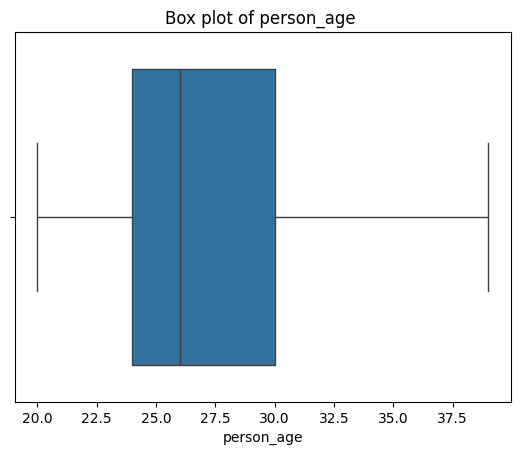

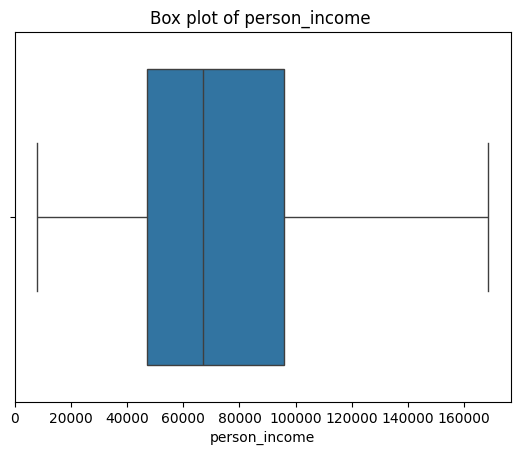

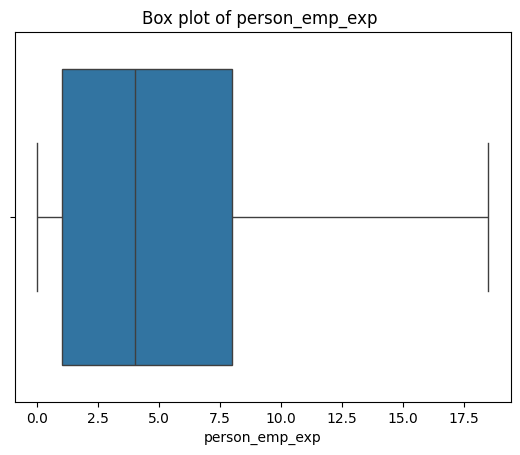

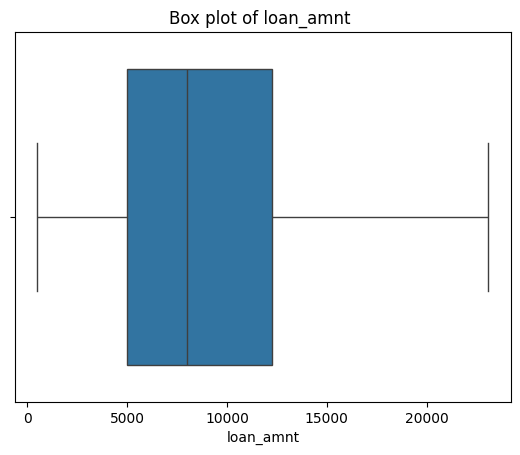

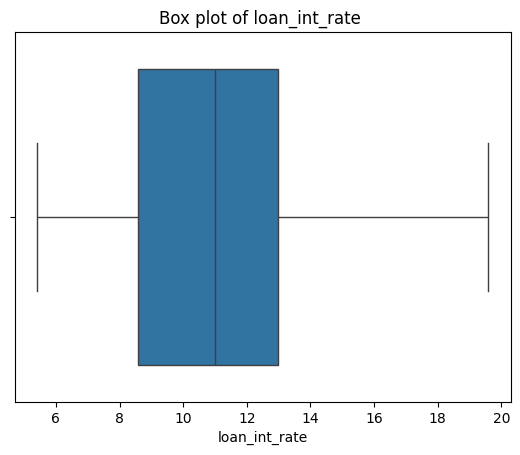

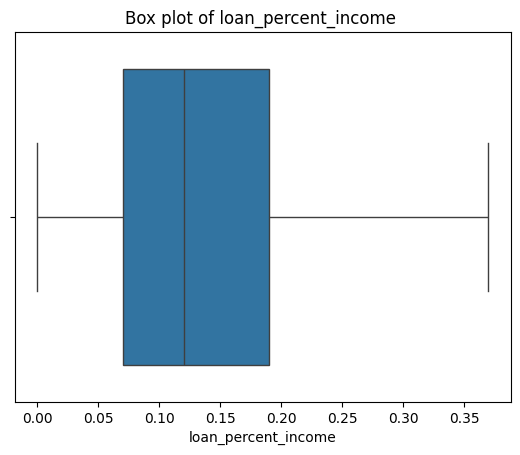

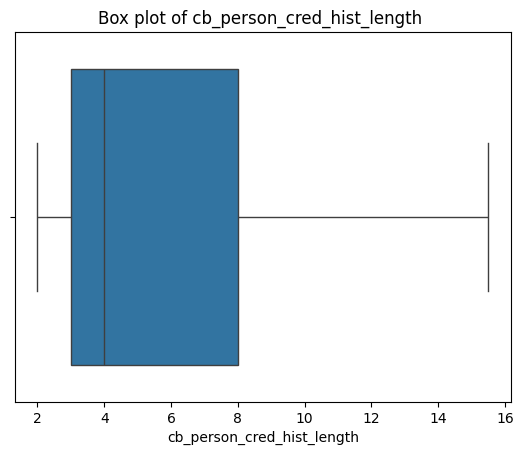

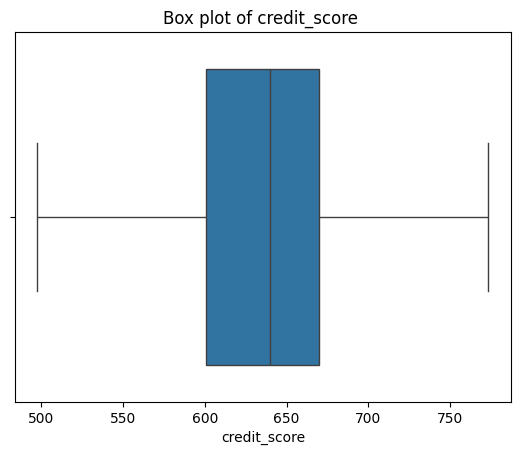

In [57]:
# Verify the changes with box plots
for col in [
     'person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
      'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
      'credit_score'
    ]:
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col} ')
    plt.show()

## Categorical Features Distribution


===== CATEGORICAL FEATURES ANALYSIS =====

Feature: person_gender
person_gender
male      24841
female    20159
Name: count, dtype: int64


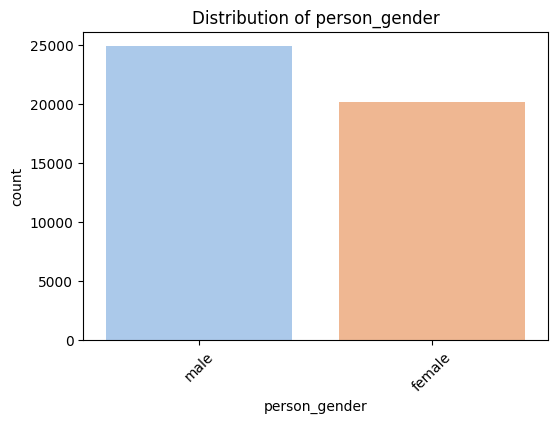


Feature: person_education
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64


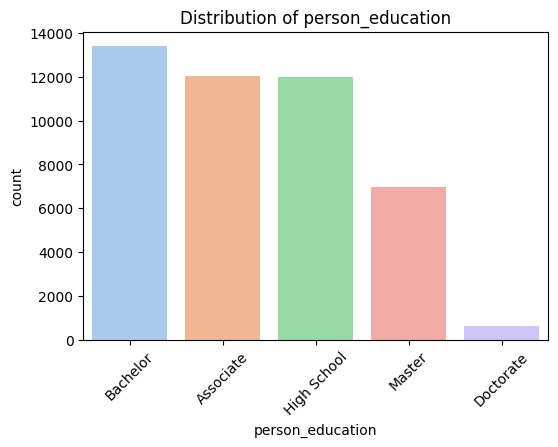


Feature: person_home_ownership
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64


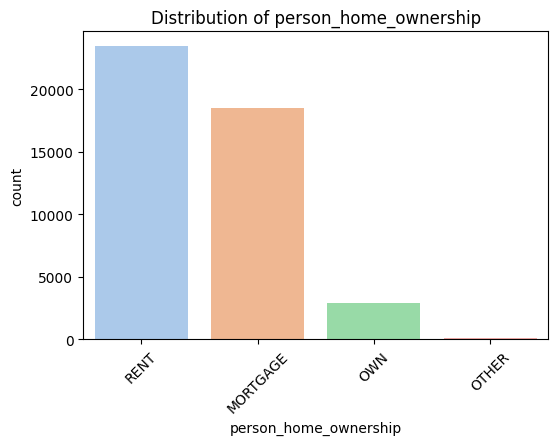


Feature: loan_intent
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64


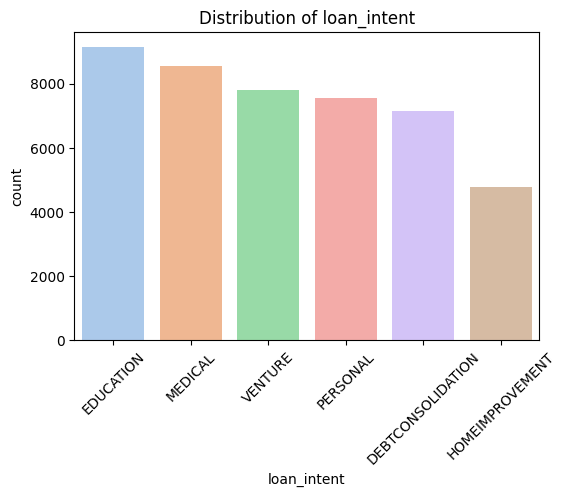


Feature: previous_loan_defaults_on_file
previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64


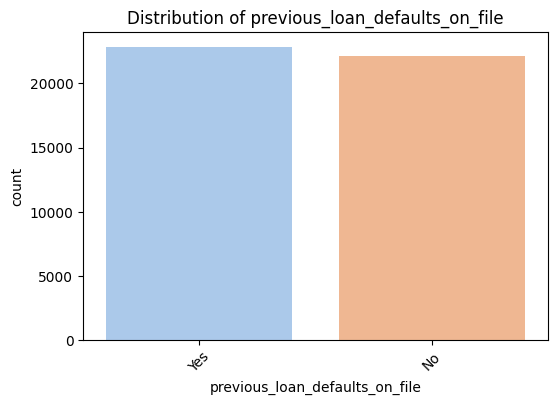

In [58]:
def categorical_features_analysis(df_binary, categorical_cols):
    print("\n===== CATEGORICAL FEATURES ANALYSIS =====")
    for col in categorical_cols:
        print(f"\nFeature: {col}")
        print(df_binary[col].value_counts())
        plt.figure(figsize=(6,4))
        sns.countplot(data=df_binary, x=col, order=df_binary[col].value_counts().index, palette='pastel')
        plt.xticks(rotation=45)
        plt.title(f'Distribution of {col}')
        plt.show()

# Usage:
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
categorical_features_analysis(df, categorical_cols)

## Numerical Features Distribution


===== NUMERICAL FEATURES ANALYSIS =====
       person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
count       45000          45000           45000      45000       45000.00   
mean           27          75677               5       9411          11.01   
std             4          38071               5       5832           2.98   
min            20           8000               0        500           5.42   
25%            24          47204               1       5000           8.59   
50%            26          67048               4       8000          11.01   
75%            30          95789               8      12237          12.99   
max            39         168667              18      23093          19.59   

       loan_percent_income  cb_person_cred_hist_length  credit_score  
count             45000.00                       45000         45000  
mean                  0.14                           5           632  
std                   0.08                 

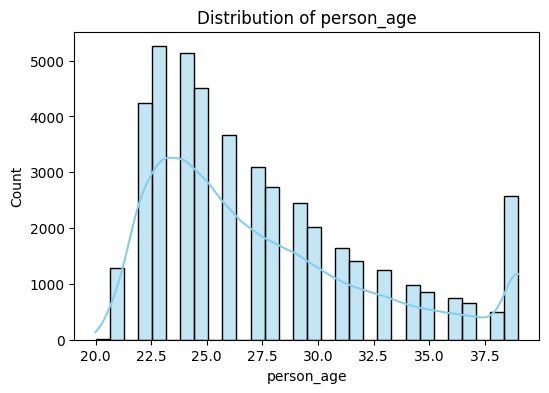

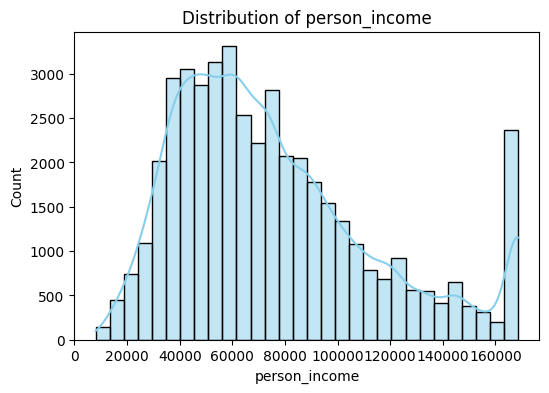

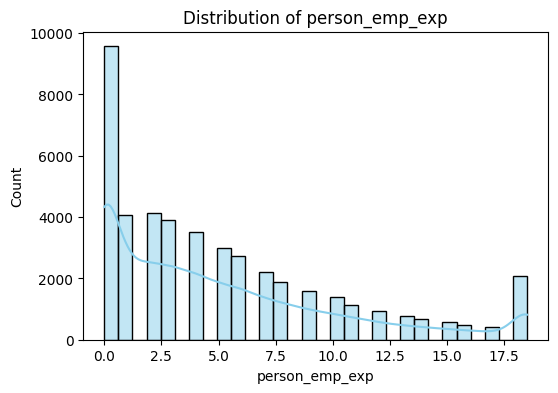

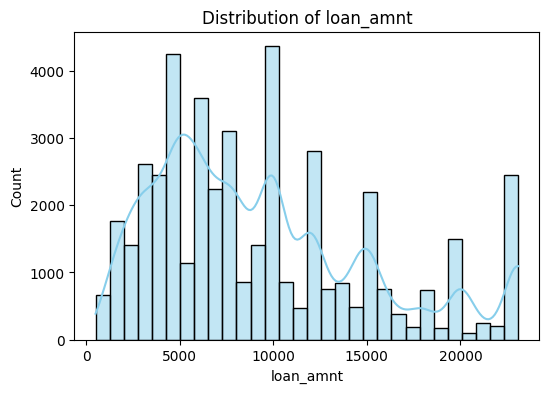

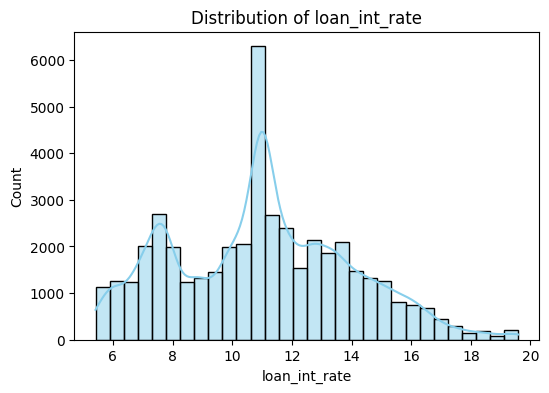

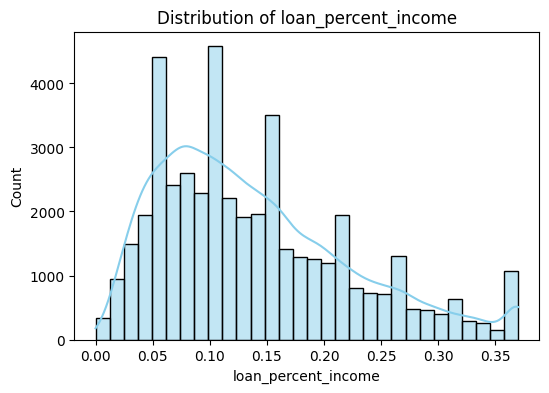

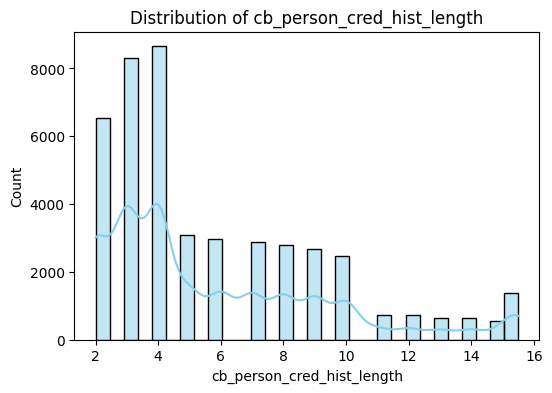

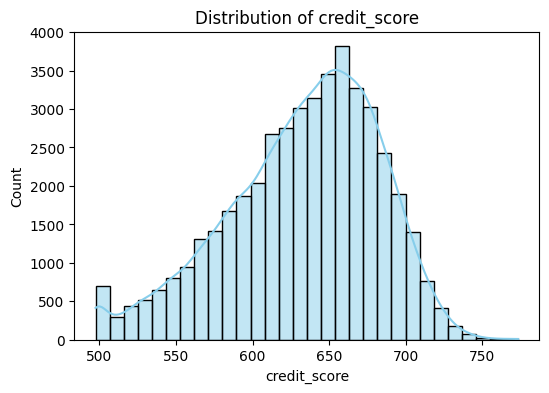

In [59]:
def numerical_features_analysis(df_binary, numerical_cols):
    print("\n===== NUMERICAL FEATURES ANALYSIS =====")
    
    # Separate float and integer columns
    float_columns = ['loan_int_rate', 'loan_percent_income']
    int_columns = [col for col in numerical_cols if col not in float_columns]
    
    # Create a copy of the DataFrame for display
    display_df = df_binary[numerical_cols].copy()
    
    # Convert integer columns to int type to remove decimal places
    for col in int_columns:
        display_df[col] = display_df[col].astype(int)
    
    # Format the describe output
    desc = display_df.describe()
    
    # Round float columns to 2 decimal places, keep integers as integers
    for col in desc.columns:
        if col in float_columns:
            desc[col] = desc[col].round(2)
        else:
            desc[col] = desc[col].astype(int)
    
    print(desc)
    
    print(f"\nFloat columns: {float_columns}")
    print(f"Integer columns: {int_columns}")
    
    # Plot histograms for all numerical columns
    for col in numerical_cols:
        plt.figure(figsize=(6,4))
        sns.histplot(df_binary[col], bins=30, kde=True, color="skyblue")
        plt.title(f'Distribution of {col}')
        plt.show()

# Usage:
numerical_features = [
    'person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
    'credit_score'
]
numerical_features_analysis(df, numerical_features)

## Correlation Analysis (Numerical Features)


===== CORRELATION ANALYSIS =====


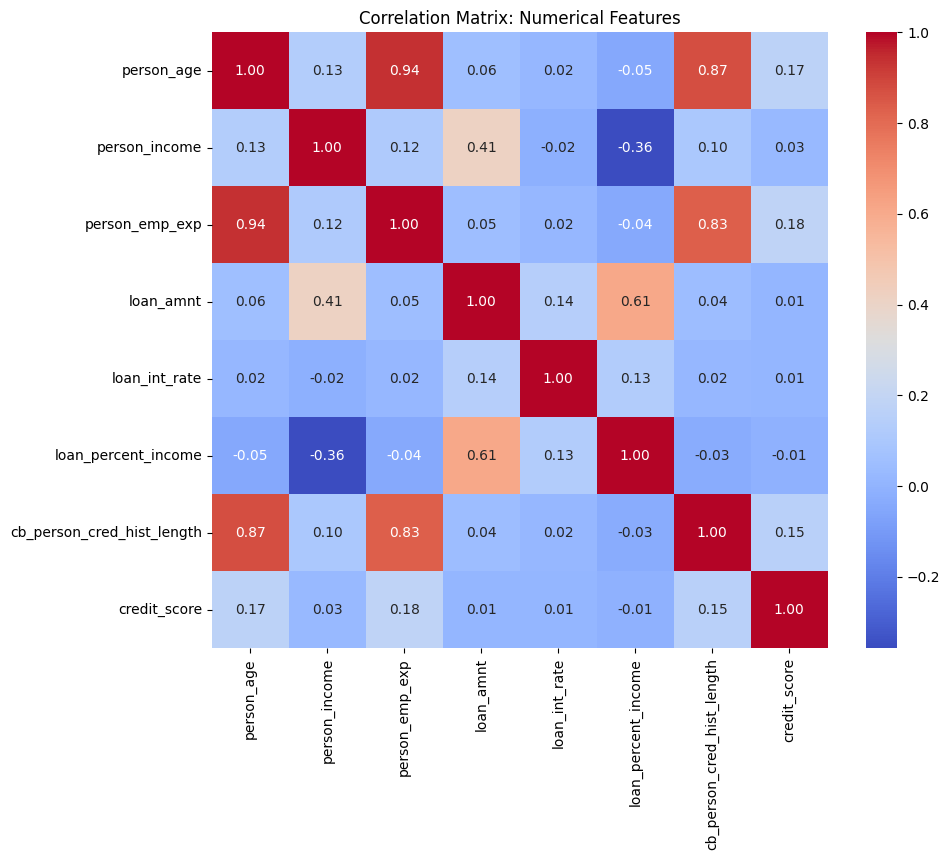


High correlations (|corr|>0.5, not including self):
person_age vs person_emp_exp: 0.94
person_age vs cb_person_cred_hist_length: 0.87
person_emp_exp vs cb_person_cred_hist_length: 0.83
loan_amnt vs loan_percent_income: 0.61


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def correlation_analysis(df, numerical_cols):
    print("\n===== CORRELATION ANALYSIS =====")
    corr = df[numerical_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Correlation Matrix: Numerical Features')
    plt.show()
    # Print high correlations (absolute > 0.5, not counting self)
    print("\nHigh correlations (|corr|>0.5, not including self):")
    high_corrs = []
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            val = corr.iloc[i,j]
            if abs(val) > 0.5:
                print(f"{corr.columns[i]} vs {corr.columns[j]}: {val:.2f}")

# Usage:
correlation_analysis(df, numerical_features)

## Multicolinearity check

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[['person_age', 'person_emp_exp', 'cb_person_cred_hist_length','loan_amnt','loan_percent_income']]
X = add_constant(X)

vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                      feature         VIF
0                       const  214.559083
1                  person_age   10.795131
2              person_emp_exp    8.172047
3  cb_person_cred_hist_length    4.285163
4                   loan_amnt    1.619610
5         loan_percent_income    1.618193


## Handled the Multicolinearity 

In [62]:
def analyze_binary_df_correlations(df, target_col='loan_status'):
    # Encode target as numeric if not numeric already
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        df = df.copy()
        df[target_col] = pd.factorize(df[target_col])[0]  # Maps categories to 0,1,...

    # Numerical Features
    numerical_cols = df.select_dtypes(include='number').columns.tolist()
    if target_col in numerical_cols:
        numerical_cols.remove(target_col)

    print("\nNumerical Features Correlation with target:")
    for col in numerical_cols:
        corr = df[col].corr(df[target_col])
        print(f"{col}: {corr:.4f}")

    # Categorical Features
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    print("\nCategorical Features Relationship with target (proportions):")
    for col in categorical_cols:
        print(f"\n{col}:")
        crosstab = pd.crosstab(df[col], df[target_col], normalize='index')
        print(crosstab.round(3))

# Usage:
analyze_binary_df_correlations(df, target_col='loan_status')


Numerical Features Correlation with target:
person_age: -0.0257
person_income: -0.2491
person_emp_exp: -0.0236
loan_amnt: 0.1073
loan_int_rate: 0.3319
loan_percent_income: 0.3847
cb_person_cred_hist_length: -0.0176
credit_score: -0.0077

Categorical Features Relationship with target (proportions):

person_gender:
loan_status        0      1
person_gender              
female         0.778  0.222
male           0.778  0.222

person_education:
loan_status           0      1
person_education              
Associate         0.780  0.220
Bachelor          0.775  0.225
Doctorate         0.771  0.229
High School       0.777  0.223
Master            0.782  0.218

person_home_ownership:
loan_status                0      1
person_home_ownership              
MORTGAGE               0.884  0.116
OTHER                  0.667  0.333
OWN                    0.925  0.075
RENT                   0.676  0.324

loan_intent:
loan_status            0      1
loan_intent                    
DEBTCONSOLIDATION 

In [63]:
# Remove the 'person_emp_exp' column from the DataFrame
df = df.drop(columns=['person_emp_exp'])

# Verify the column has been dropped
print(df.columns)

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[['person_age','cb_person_cred_hist_length','loan_amnt','loan_percent_income']]
X = add_constant(X)

vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                      feature        VIF
0                       const  81.190725
1                  person_age   4.290461
2  cb_person_cred_hist_length   4.263562
3                   loan_amnt   1.619140
4         loan_percent_income   1.617958


## Categorical Features vs Target Variable


===== CATEGORICAL FEATURES vs TARGET (%) =====

person_gender (distribution % by class):
loan_status       0     1
person_gender            
female         77.8  22.2
male           77.8  22.2


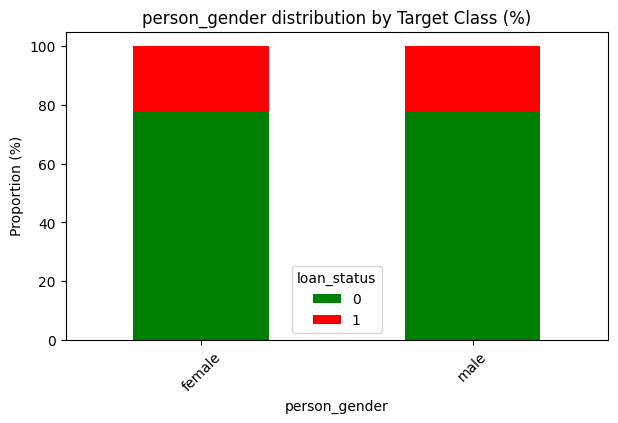


person_education (distribution % by class):
loan_status          0     1
person_education            
Associate         78.0  22.0
Bachelor          77.5  22.5
Doctorate         77.1  22.9
High School       77.7  22.3
Master            78.2  21.8


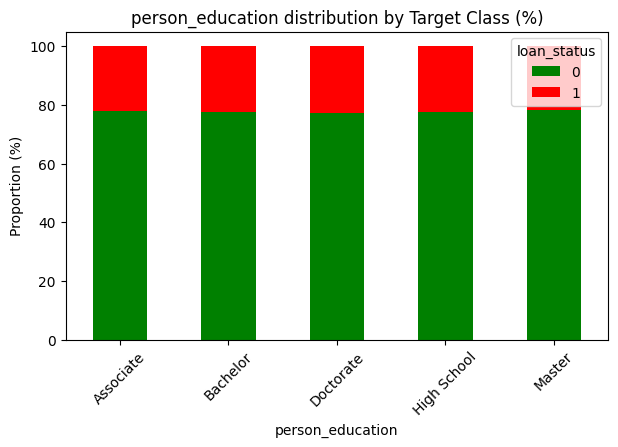


person_home_ownership (distribution % by class):
loan_status               0     1
person_home_ownership            
MORTGAGE               88.4  11.6
OTHER                  66.7  33.3
OWN                    92.5   7.5
RENT                   67.6  32.4


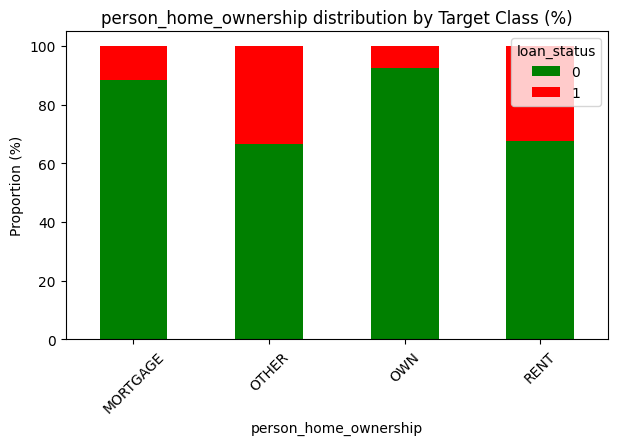


loan_intent (distribution % by class):
loan_status           0     1
loan_intent                  
DEBTCONSOLIDATION  69.7  30.3
EDUCATION          83.0  17.0
HOMEIMPROVEMENT    73.7  26.3
MEDICAL            72.2  27.8
PERSONAL           79.9  20.1
VENTURE            85.6  14.4


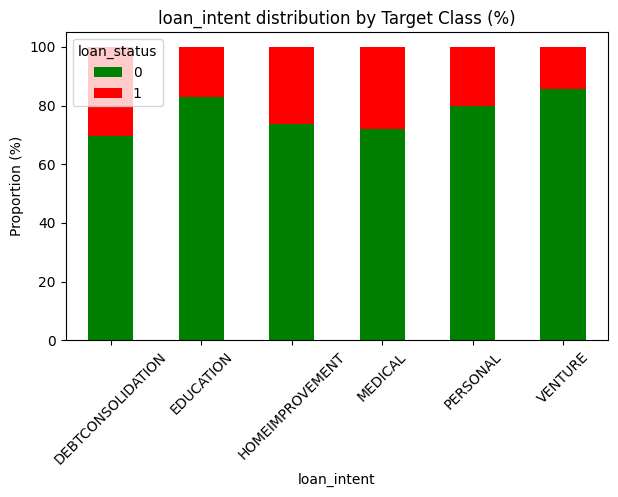


previous_loan_defaults_on_file (distribution % by class):
loan_status                         0     1
previous_loan_defaults_on_file             
No                               54.8  45.2
Yes                             100.0   0.0


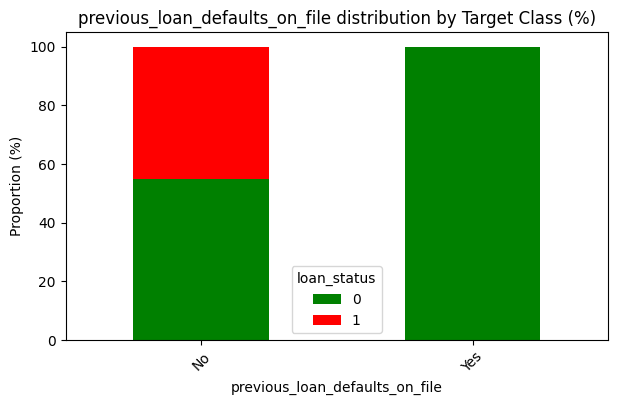

In [65]:
def categoricals_vs_target(df, categorical_cols, target_col='loan_status'):
    print("\n===== CATEGORICAL FEATURES vs TARGET (%) =====")
    for col in categorical_cols:
        ctab = pd.crosstab(df[col], df[target_col], normalize='index') * 100
        print(f"\n{col} (distribution % by class):\n{ctab.round(1)}")
        ctab.plot(kind='bar', stacked=True, figsize=(7,4), color=['green', 'red'])
        plt.title(f'{col} distribution by Target Class (%)')
        plt.ylabel('Proportion (%)')
        plt.xticks(rotation=45)
        plt.show()

# Usage:
categoricals_vs_target(df, categorical_cols)

## Encode Categorical Features

In [66]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

def encode_categorical_fixed(df, categorical_cols, categories_dict):
    df= df.copy()
    encoders = {}

    for col in categorical_cols:
        le = LabelEncoder()
        fixed_classes = np.array(categories_dict[col])
        le.fit(fixed_classes)
        
        # Verify that all values in df[col] are known categories
        unique_vals = df[col].unique()
        unseen_vals = set(unique_vals) - set(fixed_classes)
        if unseen_vals:
            raise ValueError(f"Unexpected categories in column '{col}': {unseen_vals}")

        df[col] = le.transform(df[col])
        encoders[col] = le
        print(f"Encoded {col}: {list(le.classes_)}")

    return df, encoders

# Example usage:
categorical_cols = ['person_gender', 'person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']

known_categories = {
    'person_gender': ['female','male'],
    'person_education': ['Associate', 'Bachelor', 'Doctorate', 'High School', 'Master'],
    'person_home_ownership': ["MORTGAGE", "OTHER", "OWN", "RENT"],
    'loan_intent': ['DEBTCONSOLIDATION','EDUCATION','HOMEIMPROVEMENT','MEDICAL','PERSONAL','VENTURE'],
    'previous_loan_defaults_on_file': ['No','Yes']
    
}

# Assuming df is your original DataFrame
df, encoders = encode_categorical_fixed(df, categorical_cols, known_categories)


Encoded person_gender: [np.str_('female'), np.str_('male')]
Encoded person_education: [np.str_('Associate'), np.str_('Bachelor'), np.str_('Doctorate'), np.str_('High School'), np.str_('Master')]
Encoded person_home_ownership: [np.str_('MORTGAGE'), np.str_('OTHER'), np.str_('OWN'), np.str_('RENT')]
Encoded loan_intent: [np.str_('DEBTCONSOLIDATION'), np.str_('EDUCATION'), np.str_('HOMEIMPROVEMENT'), np.str_('MEDICAL'), np.str_('PERSONAL'), np.str_('VENTURE')]
Encoded previous_loan_defaults_on_file: [np.str_('No'), np.str_('Yes')]


## Feature importance for Random forest and XGBoost

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pandas as pd

def encode_categorical_features(X):
    X_encoded = X.copy()
    for col in X_encoded.select_dtypes(include=['object', 'category']).columns:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    return X_encoded

def feature_importance_analysis(df, target_col='loan_status'):
    # Encode categorical features numerically
    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_enc = encode_categorical_features(X)

    # Encode target if not numeric
    if not pd.api.types.is_numeric_dtype(y):
        y = pd.factorize(y)[0]

    print('\nRandom Forest Feature Importances:')
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    rf.fit(X_enc, y)
    rf_imp = pd.Series(rf.feature_importances_, index=X_enc.columns).sort_values(ascending=False)
    print(rf_imp)

    print('\nXGBoost Feature Importances:')
    xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_clf.fit(X_enc, y)
    xgb_imp = pd.Series(xgb_clf.feature_importances_, index=X_enc.columns).sort_values(ascending=False)
    print(xgb_imp)

# Usage for your dataframe:
feature_importance_analysis(df, target_col='loan_status')


Random Forest Feature Importances:
previous_loan_defaults_on_file    0.227911
loan_percent_income               0.168519
loan_int_rate                     0.167350
person_income                     0.123208
person_home_ownership             0.069324
credit_score                      0.060384
loan_amnt                         0.059538
loan_intent                       0.038468
person_age                        0.032281
cb_person_cred_hist_length        0.027116
person_education                  0.017494
person_gender                     0.008405
dtype: float64

XGBoost Feature Importances:
previous_loan_defaults_on_file    0.895998
loan_percent_income               0.028282
person_home_ownership             0.027818
loan_int_rate                     0.014424
person_income                     0.009457
loan_intent                       0.008406
credit_score                      0.003792
person_age                        0.002798
loan_amnt                         0.002751
cb_person_cred_h

## Basic Model Trainnig 

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings('ignore')

def basic_logistic_regression_no_imbalance(df, target='loan_status', test_size=0.2, random_state=42):
    # Prepare features and target
    X = df.drop(columns=[target])
    y = df[target]

    # Specify numerical columns for scaling
    numeric_cols_to_scale = ['person_income', 'loan_amnt', 'credit_score', 
                             'loan_int_rate', 'loan_percent_income']
    
    # Check columns exist
    for col in numeric_cols_to_scale:
        if col not in X.columns:
            raise ValueError(f"Column '{col}' not found in dataset")

    # Split data into train and test sets with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=test_size, random_state=random_state
    )
    
    # Preprocessing: scale only specified numerical columns
    preprocessor = ColumnTransformer(
        transformers=[('num_scaler', StandardScaler(), numeric_cols_to_scale)],
        remainder='passthrough'  # leave other features unchanged
    )
    
    # Build pipeline with preprocessing + logistic regression (default params, no imbalance handling)
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('clf', LogisticRegression(max_iter=1000, random_state=random_state))
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on test set
    y_pred = pipeline.predict(X_test)

    # Evaluation metrics
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    return pipeline


In [69]:
# Run basic logistic regression without imbalance handling
model = basic_logistic_regression_no_imbalance(df)


Confusion Matrix:
[[6575  425]
 [ 494 1506]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7000
           1       0.78      0.75      0.77      2000

    accuracy                           0.90      9000
   macro avg       0.86      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000

Precision: 0.7799, Recall: 0.7530, F1 Score: 0.7662


## Model Tunnig with Logistic Regression, KNN, Random Forest and XGBoost Classifiers with Imbalance Handle

In [70]:
df

,person_age,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,3,23093.125,4,16.02,0.37,3.0,561.0,0,1
1,21.0,0,3,12282.0,2,1000.000,1,11.14,0.08,2.0,504.0,1,0
2,25.0,0,3,12438.0,0,5500.000,3,12.87,0.37,3.0,635.0,0,1
3,23.0,0,1,79753.0,3,23093.125,3,15.23,0.37,2.0,675.0,0,1
4,24.0,1,4,66135.0,3,23093.125,3,14.27,0.37,4.0,586.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,3,15000.000,3,15.66,0.31,3.0,645.0,0,1
44996,37.0,0,0,65800.0,3,9000.000,2,14.07,0.14,11.0,621.0,0,1
44997,33.0,1,0,56942.0,3,2771.000,0,10.02,0.05,10.0,668.0,0,1
44998,29.0,1,1,33164.0,3,12000.000,1,13.23,0.36,6.0,604.0,0,1


In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_score, recall_score, f1_score,
    precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

def moderate_model_training(df, target='loan_status', test_size=0.2, random_state=42):
    print("=" * 70)
    print("MODERATE MODEL TRAINING WITH SELECTIVE TUNING")
    print("=" * 70)
    
    # Prepare data
    X = df.drop(columns=[target])
    y = df[target]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )
    
    print(f"Training set shape: {X_train.shape}")
    print(f"Training set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")
    print(f"Class distribution: {y_train.value_counts().to_dict()}")
    print(f"Class ratio: {y_train.value_counts()[0]/y_train.value_counts()[1]:.2f}:1")

    
    # Specify numerical columns to scale (customized list)
    numeric_cols_to_scale = [
        'person_age', 'person_income','loan_amnt',
        'loan_int_rate', 'loan_percent_income','credit_score'
    ]
    
    # Verify specified columns exist
    missing_cols = [col for col in numeric_cols_to_scale if col not in X.columns]
    if missing_cols:
        raise ValueError(f"Columns missing from input data: {missing_cols}")
    
    # Preprocessing pipeline: scale only specified columns, pass others as-is
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numeric_cols_to_scale)
    ], remainder='passthrough')
    
    # Calculate scale_pos_weight for XGBoost imbalance handling
    scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
    
    # Define models and hyperparameter grids
    models = {
        'Logistic Regression': {
            'pipeline': Pipeline([
                ('preprocess', preprocessor),
                ('smote', SMOTE(random_state=random_state)),
                ('clf', LogisticRegression(
                    class_weight='balanced',
                    solver='liblinear',
                    max_iter=1000,
                    random_state=random_state
                ))
            ]),
            'params': {
                'clf__C': [0.1, 1, 10],
                'clf__penalty': ['l1', 'l2']
            }
        },
        'KNN': {
            'pipeline': Pipeline([
                ('preprocess', preprocessor),
                ('smote', SMOTE(random_state=random_state)),
                ('clf', KNeighborsClassifier())
            ]),
            'params': {
                'clf__n_neighbors': [3, 5, 7],
                'clf__weights': ['uniform', 'distance']
            }
        },
        'Random Forest': {
            'pipeline': Pipeline([
                ('preprocess', preprocessor),
                ('smote', SMOTE(random_state=random_state)),
                ('clf', RandomForestClassifier(
                    class_weight='balanced',
                    random_state=random_state,
                    n_jobs=-1,
                    min_samples_split=5,
                    min_samples_leaf=2
                ))
            ]),
            'params': {
                'clf__n_estimators': [50, 100, 200],
                'clf__max_depth': [10, 15, None]
            }
        },
        'XGBoost': {
            'pipeline': Pipeline([
                ('preprocess', preprocessor),
                ('smote', SMOTE(random_state=random_state)),
                ('clf', xgb.XGBClassifier(
                    use_label_encoder=False,
                    eval_metric='logloss',
                    random_state=random_state,
                    n_jobs=-1,
                    scale_pos_weight=scale_pos_weight,
                    subsample=0.8,
                    colsample_bytree=0.8
                ))
            ]),
            'params': {
                'clf__n_estimators': [50, 100, 200],
                'clf__max_depth': [4, 5, 6],
                'clf__learning_rate': [0.1, 0.2]
            }
        }
    }
    
    # Function to safely count hyperparameter combinations
    def count_combinations(param_grid):
        count = 1
        for values in param_grid.values():
            if not isinstance(values, (list, tuple, np.ndarray)):
                raise ValueError(f"Parameter grid contains non-list value: {values}")
            count *= len(values)
        return count
    
    total_combinations = sum(count_combinations(cfg['params']) for cfg in models.values())
    print(f"\nTraining models with moderate hyperparameter tuning...")
    print(f"Total combinations to test: {total_combinations}")
    print("-" * 60)
    
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_state)
    results = []
    
    for model_name, config in models.items():
        n_combinations = count_combinations(config['params'])
        print(f"Tuning {model_name} ({n_combinations} combinations)...")
        
        grid = GridSearchCV(
            estimator=config['pipeline'],
            param_grid=config['params'],
            scoring='f1',
            cv=cv,
            n_jobs=-1,
            verbose=0
        )
        grid.fit(X_train, y_train)
        
        print(f"  Best CV F1-score: {grid.best_score_:.4f}")
        print(f"  Best parameters: {grid.best_params_}")
        print("-" * 60)
        
        results.append({
            'model_name': model_name,
            'cv_score': grid.best_score_,
            'model': grid.best_estimator_,
            'best_params': grid.best_params_
        })
    
    results_df = pd.DataFrame(results)
    best_idx = results_df['cv_score'].idxmax()
    best_model_name = results_df.loc[best_idx, 'model_name']
    best_model = results_df.loc[best_idx, 'model']
    
    print(f"\nMODEL COMPARISON (CV F1-Scores):")
    print("=" * 40)
    for res in results:
        marker = "🏆" if res['model_name'] == best_model_name else "  "
        print(f"{marker} {res['model_name']}: {res['cv_score']:.4f}")
    print(f"\n🏆 BEST MODEL: {best_model_name}")
    print(f"Best CV F1-score: {results_df.loc[best_idx, 'cv_score']:.4f}")
    
    # Evaluate best model on test set
    print("\n" + "=" * 70)
    print("COMPREHENSIVE TEST SET EVALUATION")
    print("=" * 70)
    
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else None
    
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    
    print(f"\nDetailed Breakdown:")
    print(f"True Negatives (Correctly Rejected): {tn:,}")
    print(f"False Positives (Bad Loans Approved): {fp:,}")
    print(f"False Negatives (Good Loans Rejected): {fn:,}")
    print(f"True Positives (Good Loans Approved): {tp:,}")
    
    print(f"\nBusiness Metrics:")
    print(f"Specificity (Rejection Accuracy): {specificity:.4f} ({specificity * 100:.2f}%)")
    print(f"Sensitivity (Approval Accuracy): {sensitivity:.4f} ({sensitivity * 100:.2f}%)")
    
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4, target_names=['Declined (0)', 'Approved (1)']))
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\nKEY BUSINESS METRICS:")
    print(f"Precision (Quality): {precision:.4f} - {precision * 100:.2f}% of approved loans are good")
    print(f"Recall (Coverage): {recall:.4f} - {recall * 100:.2f}% of good applicants get approved")
    print(f"F1 Score (Balance): {f1:.4f}")
    
    if y_proba is not None:
        roc_auc = roc_auc_score(y_test, y_proba)
        avg_precision = average_precision_score(y_test, y_proba)
        print(f"ROC AUC (Overall): {roc_auc:.4f}")
        print(f"Avg Precision (PR): {avg_precision:.4f}")
    
    if y_proba is not None:
        print("\nGenerating evaluation plots...")
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
        axes[0].set_title(f'Confusion Matrix - {best_model_name}')
        axes[0].set_ylabel('True Label')
        axes[0].set_xlabel('Predicted Label')
        
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
        axes[1].plot(recall_vals, precision_vals, linewidth=2,
                     label=f'PR curve (AP = {avg_precision:.3f})')
        axes[1].set_xlabel('Recall')
        axes[1].set_ylabel('Precision')
        axes[1].set_title('Precision-Recall Curve')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    print("\nFeature Importance Analysis:")
    print("-" * 40)
    try:
        clf = best_model.named_steps['clf']
        if hasattr(clf, 'feature_importances_'):
            importance = clf.feature_importances_
            feature_importance_df = pd.DataFrame({
                'feature': X.columns,
                'importance': importance
            }).sort_values('importance', ascending=False)
            print("Top 10 Most Important Features:")
            print(feature_importance_df.head(10).to_string(index=False))
        elif hasattr(clf, 'coef_'):
            coef = clf.coef_[0]
            feature_importance_df = pd.DataFrame({
                'feature': X.columns,
                'coefficient': coef,
                'abs_coefficient': np.abs(coef)
            }).sort_values('abs_coefficient', ascending=False)
            print("Top 10 Most Important Features (by coefficient):")
            print(feature_importance_df.head(10)[['feature', 'coefficient']].to_string(index=False))
        else:
            print("Feature importance not available for this model type.")
    except Exception as e:
        print(f"Could not extract feature importance: {e}")
    
    return {
        'best_model': best_model,
        'best_model_name': best_model_name,
        'results': results_df,
        'test_metrics': {
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc if y_proba is not None else None,
            'avg_precision': avg_precision if y_proba is not None else None,
            'specificity': specificity,
            'sensitivity': sensitivity
        },
        'feature_importance': feature_importance_df if 'feature_importance_df' in locals() else None
    }


MODERATE MODEL TRAINING WITH SELECTIVE TUNING
Training set shape: (36000, 12)
Training set shape: (36000, 12)
Test set shape: (9000, 12)
Class distribution: {0: 28000, 1: 8000}
Class ratio: 3.50:1

Training models with moderate hyperparameter tuning...
Total combinations to test: 39
------------------------------------------------------------
Tuning Logistic Regression (6 combinations)...
  Best CV F1-score: 0.7381
  Best parameters: {'clf__C': 0.1, 'clf__penalty': 'l1'}
------------------------------------------------------------
Tuning KNN (6 combinations)...
  Best CV F1-score: 0.6816
  Best parameters: {'clf__n_neighbors': 3, 'clf__weights': 'distance'}
------------------------------------------------------------
Tuning Random Forest (9 combinations)...
  Best CV F1-score: 0.8172
  Best parameters: {'clf__max_depth': None, 'clf__n_estimators': 200}
------------------------------------------------------------
Tuning XGBoost (18 combinations)...
  Best CV F1-score: 0.8140
  Best para

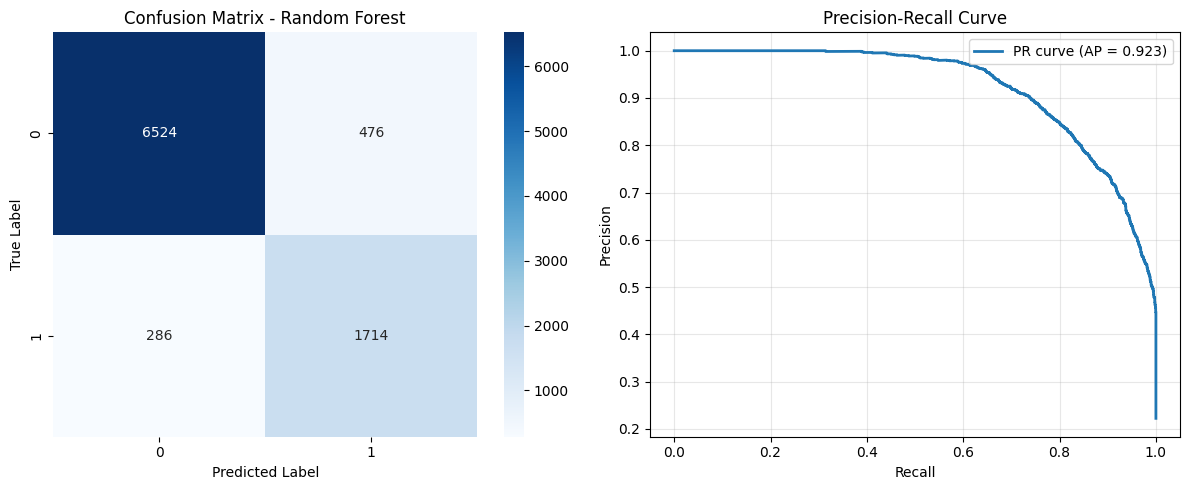


Feature Importance Analysis:
----------------------------------------
Top 10 Most Important Features:
                       feature  importance
previous_loan_defaults_on_file    0.373766
                 person_income    0.145807
         person_home_ownership    0.133639
                 person_gender    0.090730
           loan_percent_income    0.055443
              person_education    0.044037
    cb_person_cred_hist_length    0.041115
                     loan_amnt    0.036472
                    person_age    0.027531
                  credit_score    0.020384


In [96]:
results = moderate_model_training(df)
